In [1]:
import explorer as ue

In [2]:
explore = ue.UE()

In [3]:
explore.load_data('../image_umap.csv',filetype='csv')

In [4]:
explore.get_data_columns(print_cols=False, extra=["x", "y","Conc uM"])

In [5]:
explore.embed(metric='euclidean')

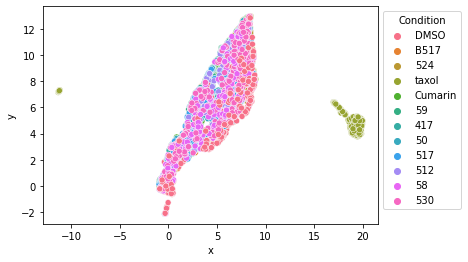

In [6]:
explore.plot(color_on='Condition')

In [7]:
explore.head()

,ImageNumber,Image_Count_Cell,Image_Count_Cytoplasm,Image_Count_Nucleus,Image_ExecutionTime_01Images,Image_ExecutionTime_02Metadata,Image_ExecutionTime_03NamesAndTypes,Image_ExecutionTime_04Groups,Image_ExecutionTime_05IdentifySecondaryObjects,Image_ExecutionTime_06IdentifyTertiaryObjects,...,Well_x,Cells_x,Condition_x,Well_y,Cells_y,Condition_y,Well,Cells,Condition,Conc uM
0,1,2795,2795,2795,0.0,0.0,0.265625,0.0,1.937500,0.484375,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001
1,2,1699,1699,1699,0.0,0.0,0.390625,0.0,10.046875,1.671875,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001
2,3,899,899,899,0.0,0.0,0.218750,0.0,6.062500,0.734375,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001
3,4,300,300,300,0.0,0.0,0.343750,0.0,2.718750,0.312500,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001
4,5,267,267,267,0.0,0.0,0.312500,0.0,2.593750,0.328125,...,A01,7702,DMSO,A01,7702,DMSO,A01,7702,DMSO,9.99001


In [8]:
explore.shape()

(3455, 901)

In [9]:
import hdbscan

import igraph as ig
import leidenalg as la

In [10]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

In [11]:
df = explore.df
data_cols = explore.data_cols

In [12]:
clusterer.fit(df[['x','y']])

HDBSCAN(gen_min_span_tree=True)

<AxesSubplot:>

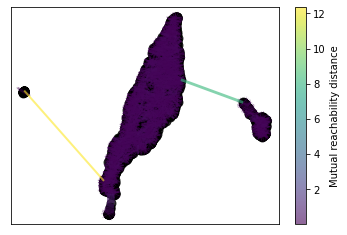

In [13]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2
                                     )

<AxesSubplot:ylabel='distance'>

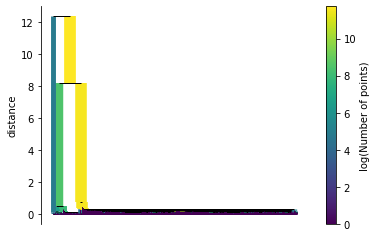

In [14]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

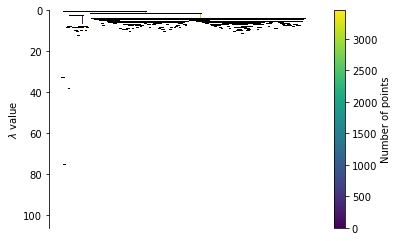

In [15]:
clusterer.condensed_tree_.plot()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='$\\lambda$ value'>

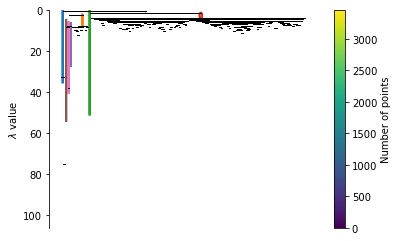

In [17]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [18]:
type(clusterer.labels_)

numpy.ndarray

In [19]:
clusterer.labels_.shape

(3455,)

In [20]:
partition = la.find_partition(df[['x','y']], la.ModularityVertexPartition)

AttributeError: 'DataFrame' object has no attribute 'vcount'

In [23]:
import networkx as nx

In [ ]:
G = nx.from_pandas_edgelist

In [22]:
%pip install networkx

     |████████████████████████████████| 2.1 MB 1.6 MB/s            
Note: you may need to restart the kernel to use updated packages.
